Importing scraped data lines

In [3]:
import matplotlib.pyplot as plt
import re
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties as fp
with open(r'C:\Users\User2\Desktop\NepOCR\txt_files\cleaned_output.txt', 'r', encoding='utf-8') as file:
    unicode_data = [line.strip() for line in file.readlines()]

Creating a dictionary where each unicode of nepali characters present in devanagari script are stored


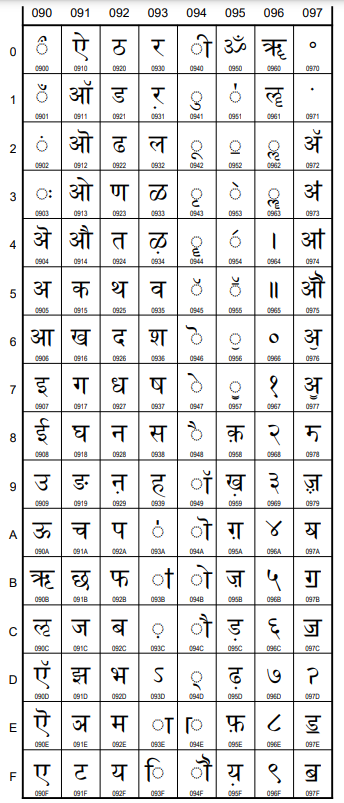

In [4]:
start_char = '\u0900'
end_char = '\u097F'

# Convert these characters to their Unicode code points
start_code = ord(start_char)
end_code = ord(end_char)

unicode_character_occurance={}
unicode_per_line={}
multi_occurence_unicode={}

devanagari_unicode_characters = [chr(code) for code in range(start_code, end_code + 1)]


In [5]:
for devangari_character in devanagari_unicode_characters:
    unicode_character_occurance[devangari_character]=0
    unicode_per_line[devangari_character]=0
    multi_occurence_unicode[devangari_character]=0

In [6]:

# Define ligature patterns (example)
def conjunct_counter(input_list):

    conjoint_pattern = re.compile(r"\w्\w")

    ligatures={"क्ष":0,"त्र":0,"ज्ञ":0}
    matches=[]
    for text in input_list:
        matches.append( conjoint_pattern.findall(text))

    for match in matches:
        if len(match)>0:
            for conjoint in match:   

                ligatures[conjoint]=ligatures.get(conjoint,0)+1
    return ligatures

conjunct_data=conjunct_counter(unicode_data)

print(conjunct_data)
# print(len("ढ्छ"))
# print(ligatures)
# import pandas as pd
# df = pd.DataFrame(ligatures.items(), columns=['Ligature', 'Count'])
# display(df)

{'क्ष': 3850, 'त्र': 4048, 'ज्ञ': 839, 'ल्ट': 193, 'क्न': 479, 'न्त': 5617, 'त्य': 5188, 'र्क': 1046, 'ङ्ख': 177, 'न्न': 2690, 'प्र': 9210, 'त्प': 520, 'र्द': 2658, 'ख्न': 439, 'र्म': 1780, 'न्म': 287, 'ग्र': 918, 'स्क': 1379, 'ल्क': 145, 'र्त': 1074, 'म्भ': 314, 'व्य': 2928, 'त्म': 1660, 'ष्ट': 1732, 'स्व': 3045, 'म्व': 56, 'न्ध': 679, 'क्त': 2009, 'र्न': 4967, 'श्व': 615, 'न्द': 3491, 'र्थ': 1857, 'र्ज': 707, 'ङ्क': 469, 'ट्र': 105, 'ल्न': 495, 'र्व': 1659, 'र्य': 1399, 'न्छ': 4184, 'ण्ड': 907, 'स्थ': 2312, 'ध्य': 1370, 'द्व': 537, 'ज्य': 899, 'ङ्ग': 1180, 'ञ्ज': 359, 'म्र': 1015, 'ष्ठ': 322, 'न्य': 1881, 'स्त': 4418, 'च्न': 166, 'ग्न': 498, 'द्द': 317, 'न्थ': 640, 'स्न': 375, 'क्छ': 333, 'द्य': 611, 'श्य': 522, 'त्क': 285, 'ढ्न': 179, 'त्व': 552, 'भ्य': 250, 'र्ट': 356, 'च्छ': 344, 'द्ध': 2438, 'त्त': 2023, 'ख्द': 85, 'म्प': 988, 'त्स': 284, 'क्य': 503, 'र्ख': 190, 'ल्य': 1144, 'त्थ': 24, 'श्र': 714, 'र्ष': 1124, 'फ्न': 1019, 'न्ज': 133, 'न्स': 185, 'ड्र': 60, 'क्र': 1526, 'र्ध': 55

In [7]:
for line in unicode_data:
    characters_in_line = {}
    char_line = line.replace(" ", "")

    for char in char_line:
        characters_in_line[char] = characters_in_line.get(char, 0) + 1
    
    for dev_char, char_count in characters_in_line.items():
        if dev_char in ',?':
            continue
        unicode_character_occurance[dev_char]+=characters_in_line[dev_char]
        unicode_per_line[dev_char] +=  1
        if char_count > 1:
            multi_occurence_unicode[dev_char] +=  1

conjunct_data=conjunct_counter(unicode_data)
total_conjuncts=sum(conjunct_data.values())
unicode_character_occurance['\u094D']=unicode_character_occurance.get('\u094D')-total_conjuncts
unicode_character_occurance.update({
    "क्ष": conjunct_data["त्र"],
    "त्र": conjunct_data["त्र"],
    "ज्ञ": conjunct_data["ज्ञ"],
})

print(sum(unicode_character_occurance.values()))

1661109


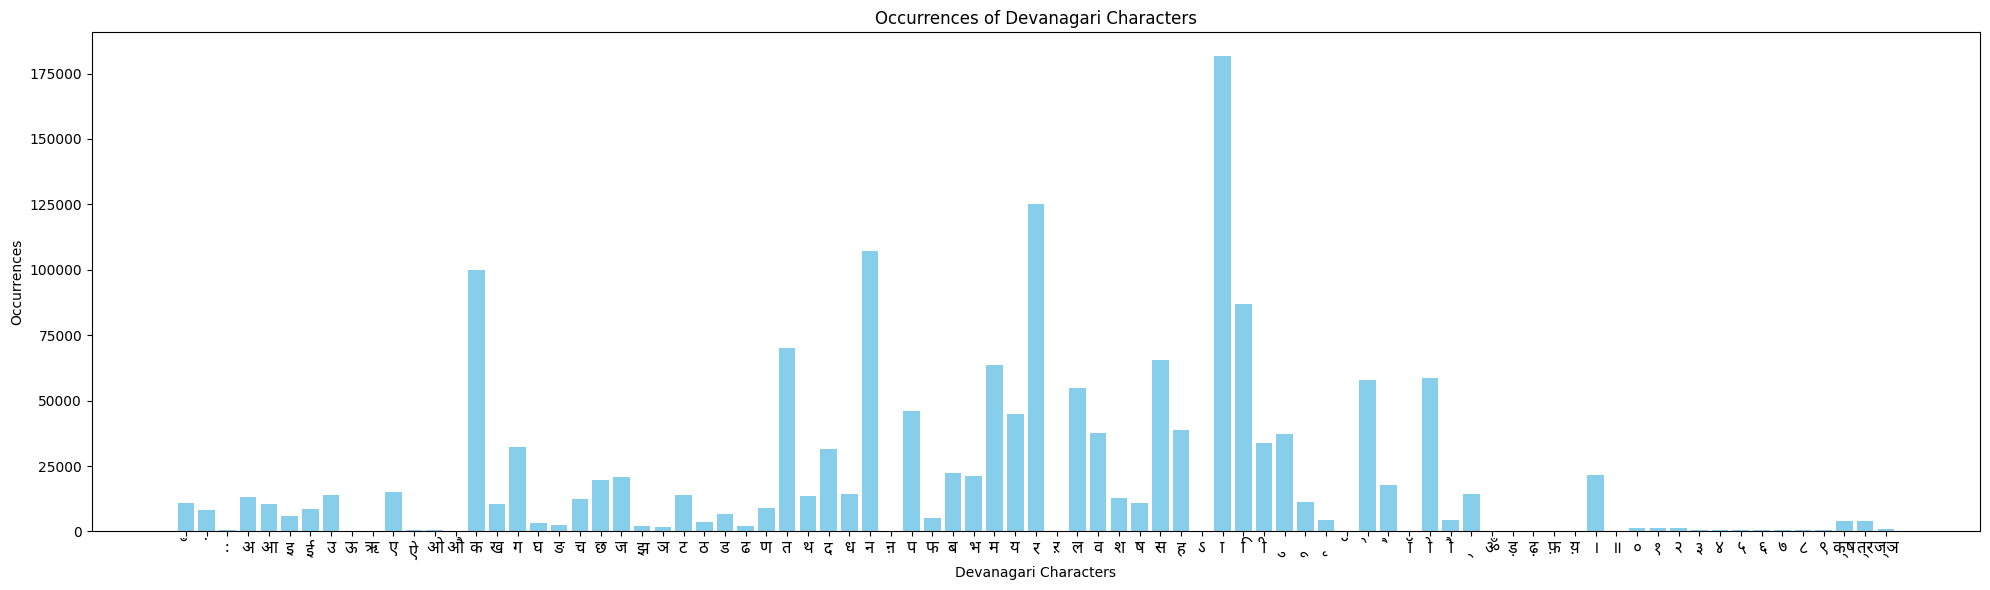

In [8]:
# for i in unicode_character_occurance:
#     print(i, unicode_character_occurance[i]) 
#     print("mulit line : ",i,multi_occurence_unicode[i])
#     print("unicode per line: ",i, unicode_per_line[i]) 
#     print('\n\n')  

font_path = r"C:\Users\User2\Desktop\NepOCR\fonts\NotoSansDevanagari-VariableFont_wdth,wght.ttf"  # Replace this with the path to your Devanagari font file
devanagari_font = fp(fname=font_path,size=12)
unicode_character_occurance={key:value for (key,value) in unicode_character_occurance.items() if value!=0 }
devangari_characters_used=unicode_character_occurance.keys()
unicode_per_line = {key: value for (key, value) in unicode_per_line.items() if value != 0}



characters = list(unicode_character_occurance.keys())
counts = list(unicode_character_occurance.values())
# Plotting the histogram
plt.figure(figsize=(20, 6))
plt.bar(characters, counts, color='skyblue')
plt.xlabel('Devanagari Characters')
plt.ylabel('Occurrences')
plt.title('Occurrences of Devanagari Characters')
plt.xticks(fontproperties=devanagari_font) 
plt.tight_layout()
plt.show()



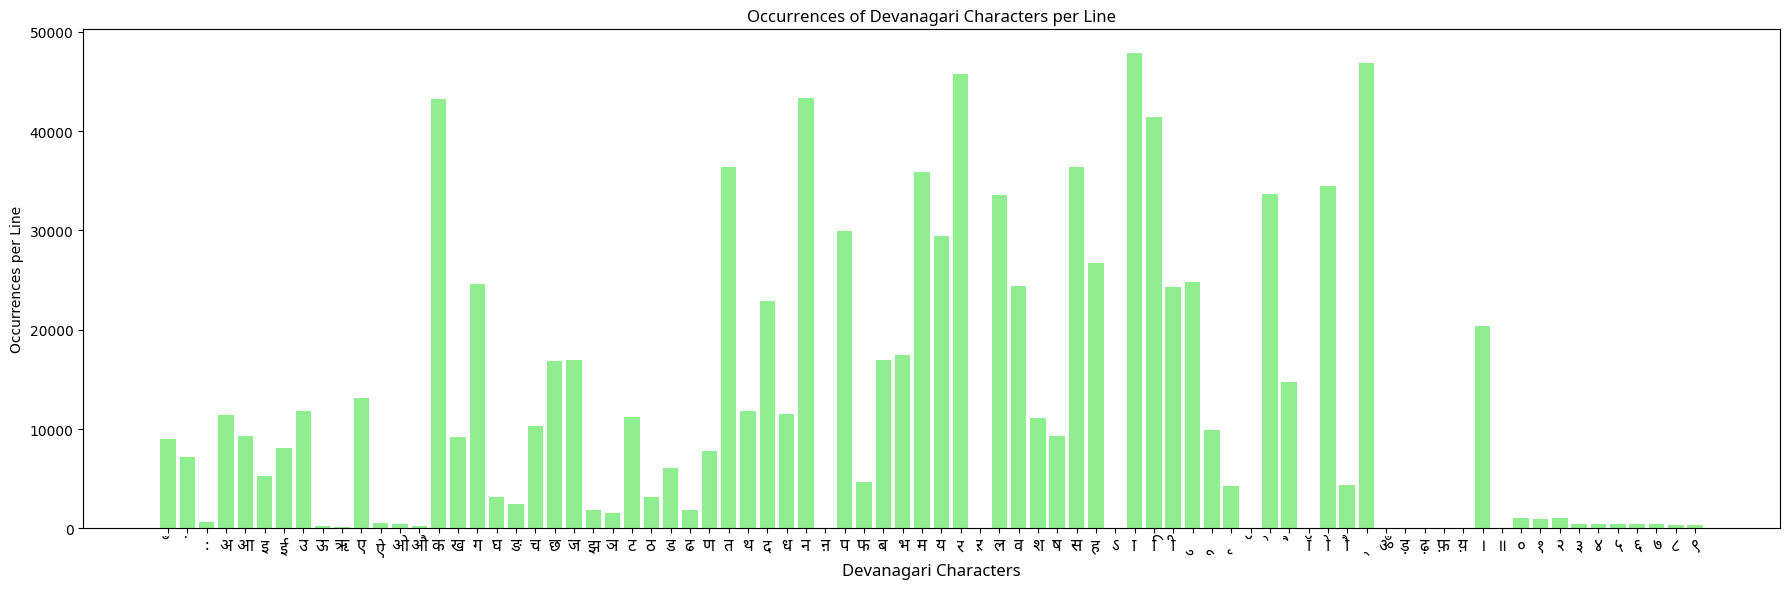

In [9]:
unicode_per_line = {key: value for (key, value) in unicode_per_line.items() if value != 0}

characters_per_line = list(unicode_per_line.keys())
counts_per_line = list(unicode_per_line.values())

plt.figure(figsize=(18, 6))

plt.bar(characters_per_line, counts_per_line, color='lightgreen')
plt.xlabel('Devanagari Characters', fontproperties=devanagari_font)
plt.ylabel('Occurrences per Line')
plt.title('Occurrences of Devanagari Characters per Line', fontproperties=devanagari_font)
plt.xticks(fontproperties=devanagari_font)
plt.tight_layout()

{'ँ': 1559, 'ं': 843, 'ः': 28, 'अ': 1593, 'आ': 981, 'इ': 504, 'ई': 520, 'उ': 1764, 'ऊ': 10, 'ऋ': 7, 'ए': 1901, 'ऐ': 3, 'ओ': 25, 'औ': 5, 'क': 31123, 'ख': 1233, 'ग': 6424, 'घ': 182, 'ङ': 192, 'च': 1680, 'छ': 2661, 'ज': 3340, 'झ': 123, 'ञ': 45, 'ट': 2183, 'ठ': 376, 'ड': 681, 'ढ': 104, 'ण': 923, 'त': 20238, 'थ': 1708, 'द': 7025, 'ध': 2060, 'न': 32012, 'प': 12474, 'फ': 445, 'ब': 3960, 'भ': 3445, 'म': 18142, 'य': 11524, 'र': 37247, 'ऱ': 2, 'ल': 14957, 'व': 9577, 'श': 1464, 'ष': 1138, 'स': 19184, 'ह': 9119, 'ऽ': 5, 'ा': 44510, 'ि': 26470, 'ी': 7484, 'ु': 8872, 'ू': 1280, 'ृ': 165, 'े': 16294, 'ै': 2755, 'ो': 16090, 'ौ': 166, '्': 40927, '।': 1136, '०': 314, '१': 183, '२': 258, '३': 47, '४': 33, '५': 55, '६': 37, '७': 84, '८': 34, '९': 67}


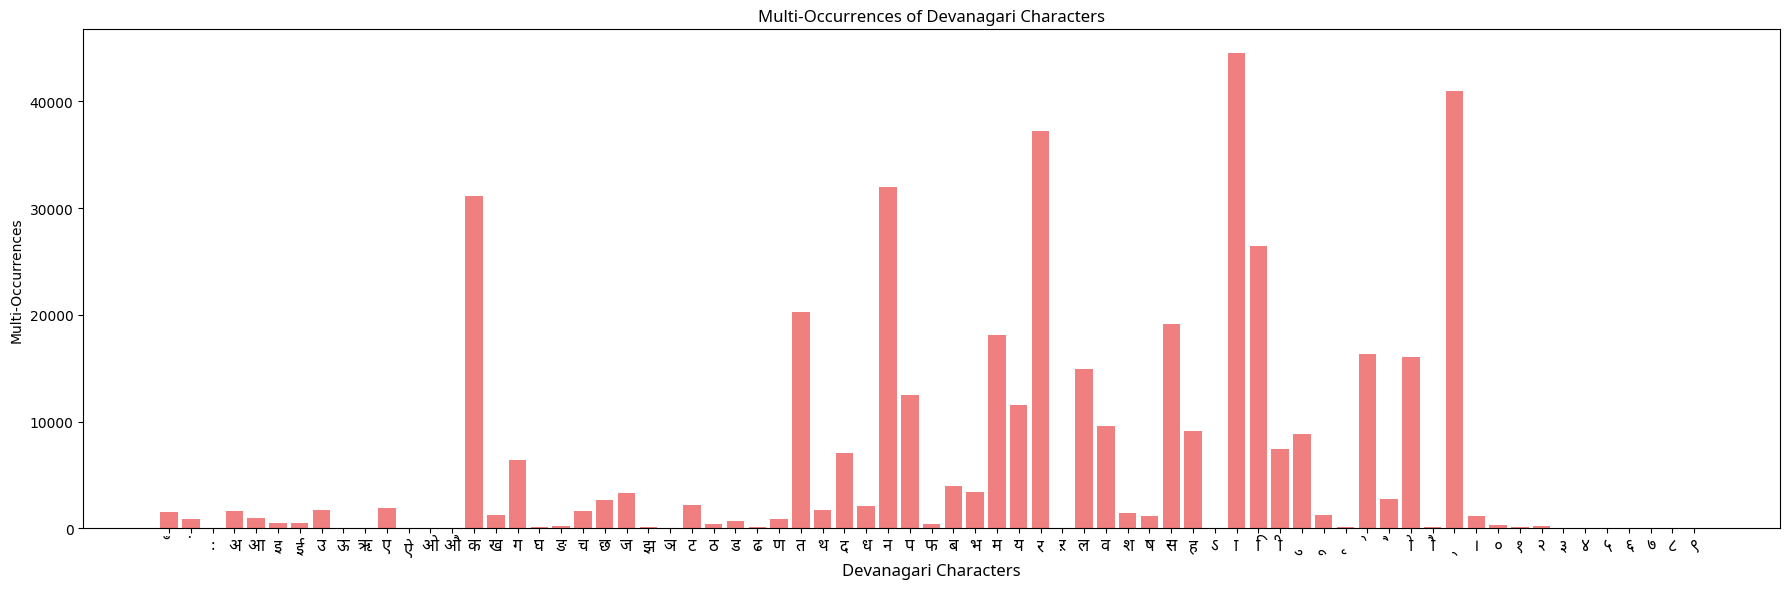

In [10]:
multi_occurence_unicode = {key: value for (key, value) in multi_occurence_unicode.items() if value != 0}
print(multi_occurence_unicode)
characters_multi_occurence = list(multi_occurence_unicode.keys())
counts_multi_occurence = list(multi_occurence_unicode.values())

plt.figure(figsize=(18, 6))
plt.bar(characters_multi_occurence, counts_multi_occurence, color='lightcoral')
plt.xlabel('Devanagari Characters', fontproperties=devanagari_font)
plt.ylabel('Multi-Occurrences')
plt.title('Multi-Occurrences of Devanagari Characters', fontproperties=devanagari_font)
plt.xticks(fontproperties=devanagari_font)
plt.tight_layout()

c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.draw()
c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.draw()
c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.draw()
c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2331 (\N{DEVANAGARI LETTER CHA}) missing from current font.
  fig.canvas.draw()
c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2333 (\N{DEVANAGARI LETTER JHA}) missing from current font.
  fig.canvas.draw()
c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}

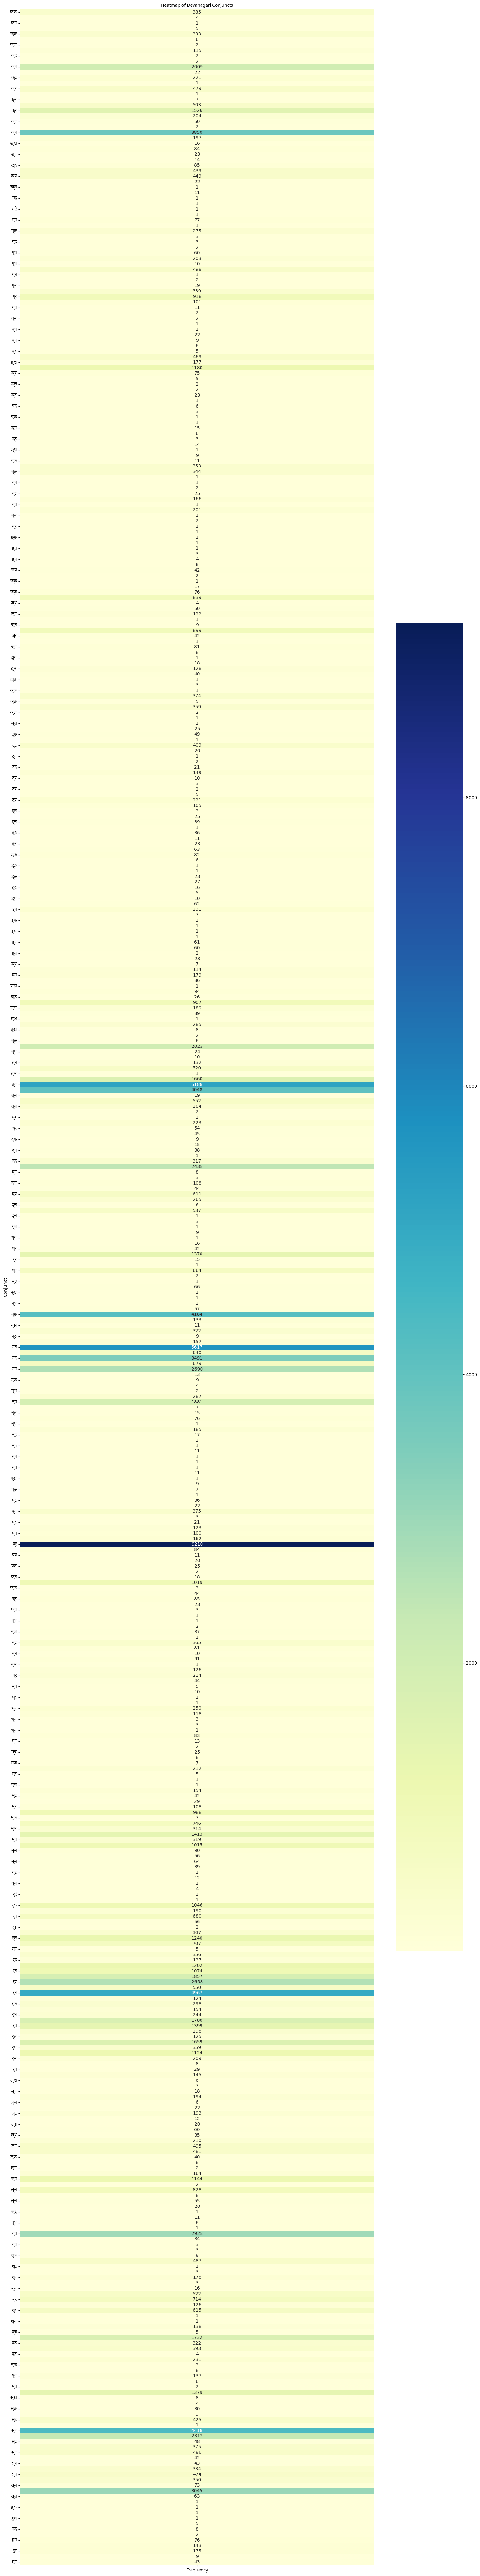

In [11]:
import seaborn as sns
from matplotlib import font_manager as fm
# Create a DataFrame from the dictionary for better handling
import pandas as pd

# Create a DataFrame from the dictionary
df = pd.DataFrame(list(conjunct_data.items()), columns=['Conjunct', 'Frequency'])
df = df.pivot_table(index='Conjunct', values='Frequency', aggfunc='sum')

# Configure the font properties
font_path = r"C:\Users\User2\Desktop\NepOCR\fonts\NotoSansDevanagari-VariableFont_wdth,wght.ttf"  # Replace this with the path to your Devanagari font file
devanagari_font = fm.FontProperties(fname=font_path, size=10)

plt.figure(figsize=(15, 80))

# Set the font globally
# plt.rcParams['font.family'] = devanagari_font.get_name()

# Plot heatmap
heatmap = sns.heatmap(df, cmap="YlGnBu", annot=True, fmt='g')

# Setting the title with the Devanagari font
plt.title('Heatmap of Devanagari Conjuncts', fontproperties=devanagari_font)

# Rotate the y-axis and x-axis labels to be horizontal
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontproperties=devanagari_font, rotation=0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontproperties=devanagari_font, rotation=0)

# Move the color bar (acts as legend) to the right side of the plot
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_label_position('right')
cbar.ax.yaxis.tick_right()

# Adjust the layout to fit everything
plt.tight_layout()
plt.show()

In [12]:
# Define Unicode ranges for Devanagari characters commonly used in Nepali
vowel_range = range(0x0900, 0x0946)  # Vowel characters
consonant_range = range(0x0915, 0x093A)  # Consonant characters
diacritic_range =  list(range(0x093E, 0x0945)) + list(range(0x0947, 0x094D)) + [0x094F]  # Vowel signs, Halant, Chandrabindu

# Convert ranges to lists of Unicode points
vowel_characters = [chr(codepoint) for codepoint in vowel_range]
consonant_characters = [chr(codepoint) for codepoint in consonant_range]
diacritic_characters = [chr(codepoint) for codepoint in diacritic_range]

# Print the lists
print("Vowel Characters:", vowel_characters)
print("Consonant Characters:", consonant_characters)
print("Diacritic Characters:", diacritic_characters)

Vowel Characters: ['ऀ', 'ँ', 'ं', 'ः', 'ऄ', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ऌ', 'ऍ', 'ऎ', 'ए', 'ऐ', 'ऑ', 'ऒ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'ऩ', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ऱ', 'ल', 'ळ', 'ऴ', 'व', 'श', 'ष', 'स', 'ह', 'ऺ', 'ऻ', '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॄ', 'ॅ']
Consonant Characters: ['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'ऩ', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ऱ', 'ल', 'ळ', 'ऴ', 'व', 'श', 'ष', 'स', 'ह']
Diacritic Characters: ['ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'ॄ', 'े', 'ै', 'ॉ', 'ॊ', 'ो', 'ौ', 'ॏ']


In [13]:
# Define Unicode ranges for Devanagari characters commonly used in Nepali
vowel_range = range(0x0900, 0x0946)  # Vowel characters
consonant_range = range(0x0915, 0x093A)  # Consonant characters
diacritic_range =  list(range(0x093E, 0x0945)) + list(range(0x0947, 0x094D)) + [0x094F]  # Vowel signs, Halant, Chandrabindu

# Convert ranges to lists of Unicode points
vowel_characters = [chr(codepoint) for codepoint in vowel_range]
consonant_characters = [chr(codepoint) for codepoint in consonant_range]
diacritic_characters = [chr(codepoint) for codepoint in diacritic_range]

# Convert lists to sets
consonants_set = set(consonant_characters)
vowels_set = set(vowel_characters)
vowel_signs_set = set(diacritic_characters)  # Remove spaces


# Union of all the other sets
all_characters_union = consonants_set | vowels_set | vowel_signs_set 


# Convert to set
devanagari_characters_used_set = set(devangari_characters_used)

# Intersection
intersection_set = devanagari_characters_used_set & all_characters_union

# Convert the result back to a list if needed
intersection_list = list(intersection_set)
print(intersection_list)

['ै', 'ढ', 'ड', 'ल', 'ः', 'ख', 'ए', 'ि', 'ी', 'स', 'ष', 'म', 'ऱ', 'ॉ', 'ृ', 'क', 'ऊ', 'ओ', 'ं', 'ट', 'च', 'प', 'उ', 'आ', 'ऐ', 'ज', 'े', 'ब', 'ँ', 'श', 'ू', 'ञ', 'ई', 'फ', 'ऋ', 'छ', 'अ', 'व', 'ौ', 'ध', 'ह', 'ऩ', 'ऽ', 'य', 'थ', 'ग', 'न', 'त', 'र', 'द', 'ु', 'ङ', 'औ', 'ॅ', 'भ', 'घ', 'ो', 'ठ', 'झ', 'इ', 'ण', 'ा']


In [14]:
total_conjuncts = 136106
characters_per_conjunct = 3
total_conjunct_characters = total_conjuncts * characters_per_conjunct

total_characters_in_dataset = 1661109

percentage_conjuncts = (total_conjunct_characters / total_characters_in_dataset) * 100

print(f"Percentage of the data that is composed of conjuncts: {percentage_conjuncts:.2f}%")


Percentage of the data that is composed of conjuncts: 24.58%


In [15]:
sorted_conjuncts = sorted(conjunct_data.items(), key=lambda item: item[1], reverse=True)

# Select the top 30 conjuncts
top_n = 40  # 
top_conjuncts = sorted_conjuncts[:top_n]
top_conjuncts=[key for (key,value) in top_conjuncts]
top_conjuncts.remove('ङ्ग')
# Display the top conjuncts and their frequencies
# print(f"Top {top_n} conjuncts:")
# for conjunct, frequency in top_conjuncts:
#     print(f"{conjunct}: {frequency}")
print(top_conjuncts)

['प्र', 'न्त', 'त्य', 'र्न', 'स्त', 'न्छ', 'त्र', 'क्ष', 'न्द', 'स्व', 'व्य', 'न्न', 'र्द', 'द्ध', 'स्थ', 'त्त', 'क्त', 'न्य', 'र्थ', 'र्म', 'ष्ट', 'त्म', 'र्व', 'क्र', 'म्म', 'र्य', 'स्क', 'ध्य', 'र्छ', 'र्ण', 'ल्य', 'र्ष', 'र्त', 'र्क', 'फ्न', 'म्र', 'म्प', 'ग्र', 'ण्ड']


In [16]:

dev_chars=['म', 'झ', 'ट', 'ऽ', 'ी', 'ओ', 'ु', 'ऐ', 'क', 'घ', 'ञ', 'छ', 'व', 'स', 'ज', 'ौ', 'ब', 'ू', 'ध', 'ए', 'थ', 'च', 'ण', 'भ', 'ा', 'उ', 'ॉ', 'र', 'त', 'ॅ', 'ढ', 'ग', 'ष', 'ल', 'ह', 'य', 'ऩ', 'प', 'ई', 'ि', 'न', 'औ', 'ृ', 'ठ', 'अ', 'इ', 'ै', 'े', 'द', 'ः', 'ड', 'श', 'ो', 'आ', 'ख', 'ं', 'ऱ', 'ऋ', 'ँ', 'फ', 'ङ', 'ऊ']
    
#ligatures top 40 in terms of frequency of collected data (obtained from datastats.ipynb)
conjuncts_top_40=['प्र', 'न्त', 'त्य', 'र्न', 'स्त', 'न्छ', 'त्र', 'क्ष', 'न्द', 'स्व', 'व्य', 'न्न', 'र्द', 'द्ध', 'स्थ', 'त्त', 'क्त', 'न्य', 'र्थ', 'र्म', 'ष्ट', 'त्म', 'र्व', 'क्र', 'म्म', 'र्य', 'स्क', 'ध्य', 'र्छ', 'र्ण', 'ङ्ग', 'ल्य', 'र्ष', 'र्त', 'र्क', 'फ्न', 'म्र', 'म्प', 'ग्र', 'ण्ड']

sorted_char_list = sorted(dev_chars, key=lambda char: ord(char[0]))
merged_list = sorted_char_list + conjuncts_top_40

additional_characters = '०१२३४५६७८९,,?।-' #digits and punctuations
characters_to_remove = 'ऩऱऽॅॉ' 
# Create the final string
final_string = ''.join(merged_list) + additional_characters
# Remove specified characters
final_string = re.sub(f'[{re.escape(characters_to_remove)}]', '', final_string)
print(final_string)

ँंःअआइईउऊऋएऐओऔकखगघङचछजझञटठडढणतथदधनपफबभमयरलवशषसहािीुूृेैोौप्रन्तत्यर्नस्तन्छत्रक्षन्दस्वव्यन्नर्दद्धस्थत्तक्तन्यर्थर्मष्टत्मर्वक्रम्मर्यस्कध्यर्छर्णङ्गल्यर्षर्तर्कफ्नम्रम्पग्रण्ड०१२३४५६७८९,,?।-


In [17]:
import requests
import re
from bs4 import BeautifulSoup
def web_scrape(urls):
    collected_td = []
    # Iterate over the URLs
    for url in urls:
        # Send a GET request to the URL
        response = requests.get(url)
        response.encoding = 'utf-8'  

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        tables = soup.find_all("td")

        # Append the paragraphs to the data list
        for table_data in tables:
            collected_td.append(table_data.get_text())
    return collected_td

urls=[r'https://www.learnentry.com/english-nepali/1000-most-common-nepali-words/',r'https://nepali.imnepal.com/learn-nepali-words/']
webpage_collected_words=web_scrape(urls)
def remove_non_dev(line):
    pattern = r'[^\u0900-\u097F,?\s]'  # Define a pattern to remove non-Devanagari characters and whitespace
    data_line = re.sub(pattern, ' ', line.strip())   
    return data_line 
webpage_collected_words=[remove_non_dev(td).strip() for td in webpage_collected_words ]
webpage_collected_words=[td for td in webpage_collected_words if td!='']
print(set(webpage_collected_words))

all_lines=[]
with open(r'C:\Users\User2\Desktop\NepOCR\txt_files\cleaned_output.txt','r',encoding='utf-8') as read_file:
    all_lines=read_file.readlines()

# Function to tokenize a line into words
def tokenize_line(line):
    words = re.findall(r'\b\w+\b', line)
    return words

all_words = []
for line in all_lines:
    words_in_line = tokenize_line(line)
    all_words.extend(words_in_line)

# Convert the list of words into a set to remove duplicates
dataset_collected_words = set(all_words)
intersection_set = set(webpage_collected_words).intersection(dataset_collected_words)


# Print the union set
print(intersection_set)



{'हात्ती', 'चौडा', 'निष्पक्ष', 'अचार', 'विशेषता', 'मासु', 'विचार गर्नुहोस्', 'क्वारेन्टिन', 'विभाजन', 'कदर गर्छौं', 'नृत्य', 'जडान गर्नुहोस्', 'गहना', 'पातलो', 'महत्त्वपूर्ण', 'सहमत', 'सेतो', 'अवरोध', 'गरिबी', 'आत्मसमर्पण', 'बोक्ने', 'रिक्तता', 'बाक्लो', 'लेख', 'नियन्त्रण', 'उत्पादन गर्न', 'मानसिक', 'जनसंख्या', 'रक्सी', 'मिसावट गर्ने', 'निर्देशन', 'प्रभाव', 'सान्दर्भिक', 'ड्राइभ', 'सेवा', 'ईश्वरीय', 'बहिष्कार', 'बर्ष', 'प्वाल', 'संविधान', 'खानु', 'देखिने', 'वर्णन गर्नुहोस्', 'उन्मूलन', 'पनि', 'अनियमित', 'हिज्जे', 'इच्छा', 'प्रेरित गर्नुहोस्', 'रेखा', 'किनभने', 'उपयोगी', 'रुप', 'अनुरोध', 'सकारात्मक', 'तयारी', 'डेलिभरी', 'सहर', 'सक्रिय गर्नुहोस्', 'धन्यवाद', 'प्रयास', 'प्रशंसा', 'बायाँ', 'नक्शा वा रुपरेखा तयार पार्ने व्यक्ति', 'स्वच्छता', 'मेटाउन', 'हाँस्न', 'विकल्प', 'निष्कर्ष', 'अनुभव', 'हरेक', 'पाल', 'आयोग', 'परोपकार', 'मंगेतर', 'केबल', 'हिम्मत', 'कुटीर', 'नुन', 'समझदार', 'संलग्नक', 'कमाई', 'खरायो', 'रात', 'कण', 'जङ्गल', 'विपरीत', 'असाधारण', 'संक्षिप्त नाम', 'लेखक', 'राय', 'समर्थन', '

FileNotFoundError: [Errno 2] No such file or directory: 'txt_files\\cleaned_output.txt'